# ***Reparameterization of common distributions***





We will work with Torch throughout this notebook.

In [35]:
import torch
from torch.distributions import Beta, Exponential, Uniform, Gumbel, Categorical #, ...  import the distributions you need here
from torch.nn import functional as F

A helper function to visualize the generated samples:

In [36]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=100, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range, alpha=0.5)
    plt.hist(samples_2, bins=bins, range=range, alpha=0.5)
  else:
    plt.hist(samples_1, bins=bins, alpha=0.5)
    plt.hist(samples_2, bins=bins, alpha=0.5)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

### ***Q1. Exponential Distribution***
Below write a function that generates N samples from $Exp (\lambda)$.

In [37]:
def exp_sampler(l, N):
  samples = Exponential(l).sample((N,))
  return samples # should be N-by-1

Now, implement the reparameterization trick:

In [38]:
def inv_cdf_exp(l, samples) :
  samples = -torch.log(1-samples)/l
  return samples

def exp_reparametrize(l,N):
  # this function should return N samples via reparametrization,
  samples = Uniform(0,1).sample((N,))

  # reparametrization
  samples = inv_cdf_exp(l, samples)
  return samples

Generate samples for $\lambda = 1$ and compare:

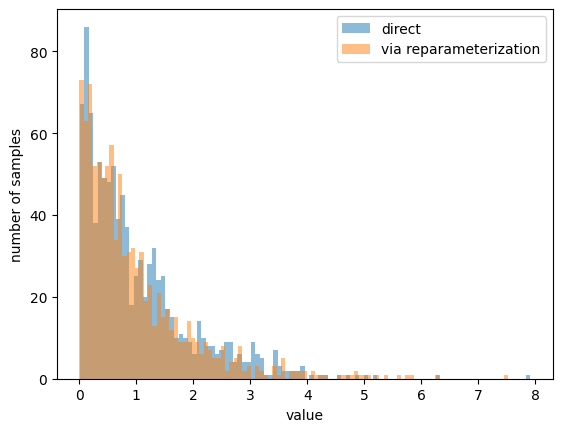

In [39]:
l = 1    #lambda
N = 1000
direct_samples = exp_sampler(l, N)
reparametrized_samples = exp_reparametrize(l, N)
compare_samples(direct_samples, reparametrized_samples)

### ***Q2. Categorical Distribution***
Below write a function that generates N samples from Categorical (**a**), where **a** = $[a_0, a_1, a_2, a_3]$.

In [40]:
def categorical_sampler(a, N):
  # insert your code
  samples = Categorical(a).sample((N,))
  return samples  # should be N-by-1

Now write a function that generates samples from Categorical (**a**) via reparameterization:




In [41]:
# Hint: approximate the Categorical distribution with the Gumbel-Softmax distribution
def categorical_reparametrize(a, N, temp=0.1, eps=1e-20):  # temp and eps are hyperparameters for Gumbel-Softmax
  # insert your code
  samples = Gumbel(0,1).sample((N, a.shape[0]))

  # Add eps to prevent numerical instability in the log operation
  a = a + eps

  # reparametrization
  samples = F.softmax((torch.log(a)+samples)/temp, dim=1)
  return samples # make sure that your implementation allows the gradient to backpropagate


Generate samples when $a = [0.1,0.2,0.5,0.2]$ and visualize them:

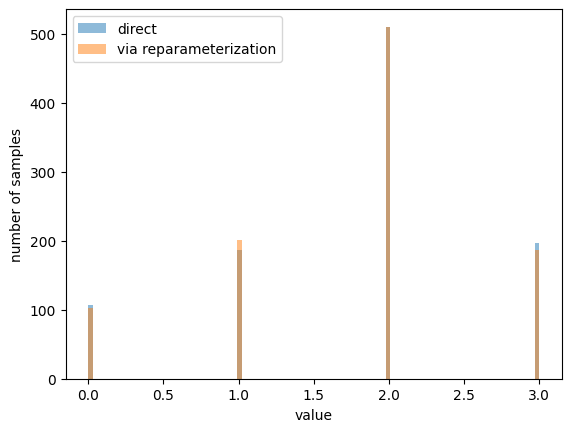

In [52]:
a = torch.tensor([0.1,0.2,0.5,0.2])
N = 1000
direct_samples = categorical_sampler(a, N)
reparametrized_samples = categorical_reparametrize(a, N, temp=0.1, eps=1e-20)
reparametrized_samples = torch.argmax(reparametrized_samples, dim=1)
compare_samples(direct_samples, reparametrized_samples)